In [1]:
#Data retrieving

#Packages
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns # for ploting the graph
from scipy.stats import norm #for fitting normal distribution curve
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Loading the data from csv file
bank_p = '/Users/dprasadg/Downloads/bank-full.csv'
bank = pd.read_csv(bank_p, sep=';', decimal='.', header=0)
bank.head()
bank

NameError: name 'r' is not defined

In [2]:
#Data pre-processing


#selecting colums of object type and storing bank_obj.
bank_obj = bank.select_dtypes(['object'])

#Striping white spaces for variables of object type(string)
bank[bank_obj.columns] = bank_obj.apply(lambda x: x.str.strip())
bank.head()

#to check any missing values in each of the columns
bankvalue = bank.apply(lambda x: x.isnull().value_counts())
bankvalue

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
False,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211


D:\Dev\Python\Python 2.7\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


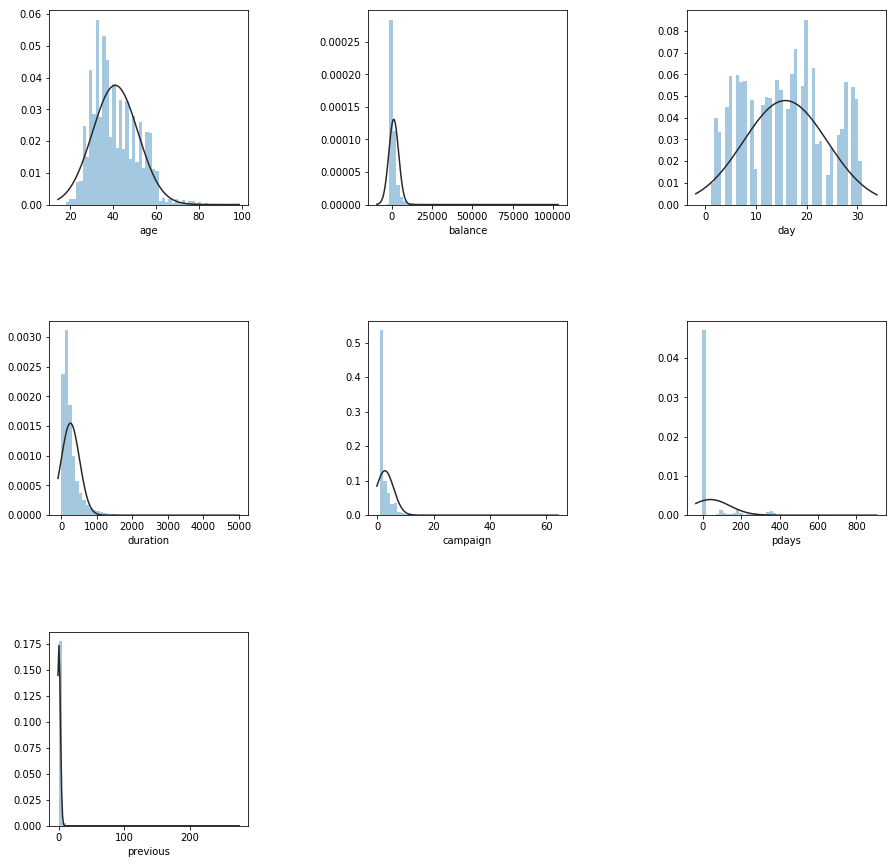

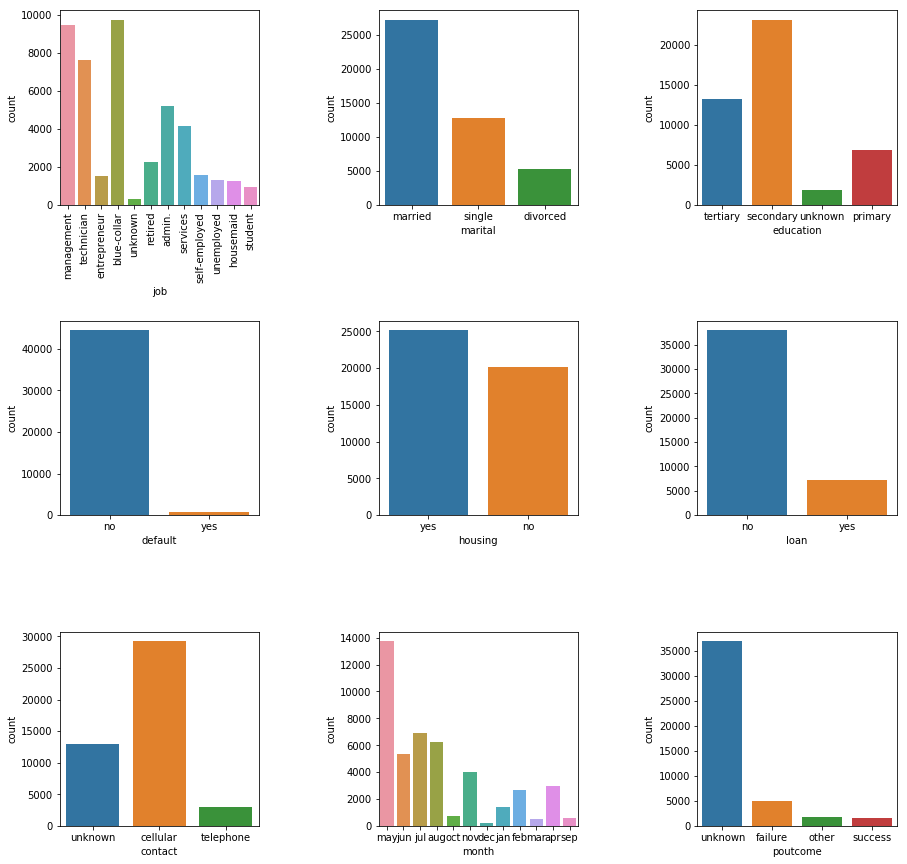

In [3]:
#Data exploration

#Exploring each of the numerical data

num_columns = ['age','balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.6, wspace=0.6)

count = 1
for num_column in num_columns:
    ax = fig.add_subplot(3, 3, count)
    sns.distplot(bank[num_column], fit=norm, kde=False )
    count += 1
    
    
#Exploring each of the categorical data
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.6, wspace=0.6)
ax = fig.add_subplot(3, 3, 1)
sns.countplot(x=bank["job"])
plt.xticks(rotation=90)
ax = fig.add_subplot(3, 3, 2)
sns.countplot(x=bank["marital"])
ax = fig.add_subplot(3, 3, 3)
sns.countplot(x=bank["education"])
ax = fig.add_subplot(3, 3, 4)
sns.countplot(x=bank["default"])
ax = fig.add_subplot(3, 3, 5)
sns.countplot(x=bank["housing"])
ax = fig.add_subplot(3, 3, 6)
sns.countplot(x=bank["loan"])
ax = fig.add_subplot(3, 3, 7)
sns.countplot(x=bank["contact"])
ax = fig.add_subplot(3, 3, 8)
sns.countplot(x=bank["month"])
ax = fig.add_subplot(3, 3, 9)
sns.countplot(x=bank["poutcome"])

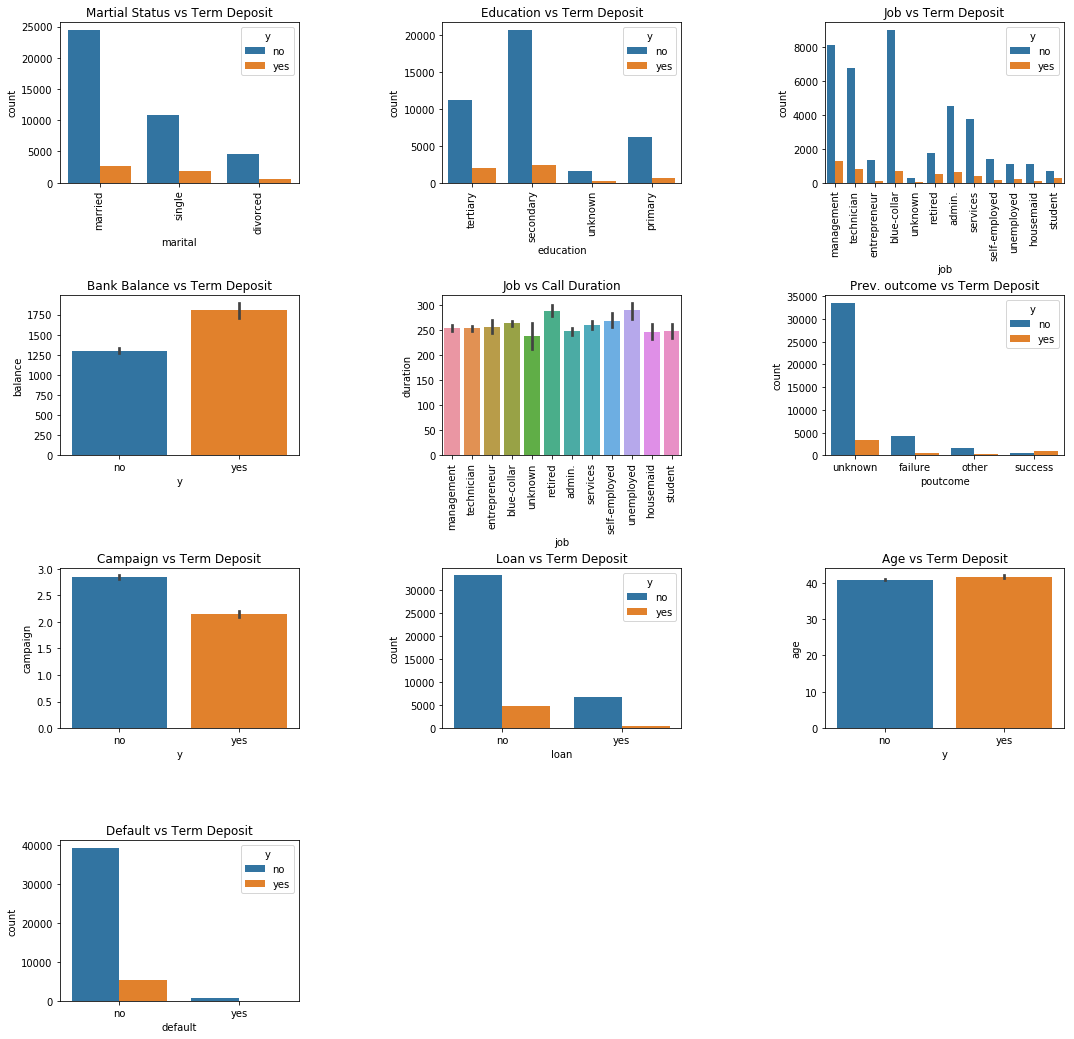

In [4]:
#Data exploration part 2
#Relationships between the attributes are described here
fig = plt.figure(figsize=(18,18))
fig.subplots_adjust(hspace=0.7, wspace=0.6)

#Relationship between maritial status and term deposit predictor
ax = fig.add_subplot(4, 3, 1)
sns.countplot(x=bank["marital"],hue=bank["y"])
plt.title('Martial Status vs Term Deposit')
plt.xticks(rotation=90)

#Relationship between educational background and term deposit predictor
ax = fig.add_subplot(4, 3, 2)
sns.countplot(x=bank["education"],hue=bank["y"])
plt.title('Education vs Term Deposit')
plt.xticks(rotation=90)

#Relationship between job and term deposit predictor
ax = fig.add_subplot(4, 3, 3)
sns.countplot(x=bank["job"],hue=bank["y"])
plt.title('Job vs Term Deposit')
plt.xticks(rotation=90)

#Relationship between bank balance and term deposit predictor
ax = fig.add_subplot(4, 3, 4)
sns.barplot(x=bank["y"], y=bank["balance"])
plt.title('Bank Balance vs Term Deposit')

#Relationship between job and duration of the call
ax = fig.add_subplot(4, 3, 5)
sns.barplot(x=bank["job"], y=bank["duration"])
plt.title('Job vs Call Duration')
plt.xticks(rotation=90)

#Relationship between previous putcome of the call and term deposit predictor
ax = fig.add_subplot(4, 3, 6)
sns.countplot(x=bank["poutcome"],hue=bank["y"])
plt.title('Prev. outcome vs Term Deposit')

#Relationship between campaign and term deposit predictor
ax = fig.add_subplot(4, 3, 7)
sns.barplot(x=bank["y"], y=bank["campaign"])
plt.title('Campaign vs Term Deposit')

#Relationship between loan and term deposit predictor
ax = fig.add_subplot(4, 3, 8)
sns.countplot(x=bank["loan"],hue=bank["y"])
plt.title('Loan vs Term Deposit')

#Relationship between age and term deposit predictor
ax = fig.add_subplot(4, 3, 9)
sns.barplot(x=bank["y"], y=bank["age"])
plt.title('Age vs Term Deposit')

#Relationship between deafult and term deposit predictor
ax = fig.add_subplot(4, 3, 10)
sns.countplot(x=bank["default"], hue=bank["y"])
plt.title('Default vs Term Deposit')


In [5]:
#Data modeling

clean_bank=bank.copy()

#Custom function for converting to binary values
def bool(row,col):
    return 1 if row[col] == "yes" else 0

#Converting boolean columns values to binary and renaming the column
bool_cols = ['default', 'housing', 'loan', 'y']
for bool_col in bool_cols:
    clean_bank[bool_col + '_bool'] = bank.apply(lambda x: bool(x,bool_col), axis=1)

    
#splitting the categorical columns into each of the columns and renaming the column
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

for col in  cat_columns:
    clean_bank = pd.concat([clean_bank.drop(col, axis=1), pd.get_dummies(clean_bank[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=False)], axis=1)
        
clean_bank = clean_bank.drop(columns = bool_cols)    
clean_bank.head()
#Dropping pdays column
clean_bank = clean_bank.drop(columns= ["pdays"])

#Forming X and Y for train test split
bankx = clean_bank.drop("y_bool", axis=1)
banky =  clean_bank["y_bool"]

clean_bank.head()


,age,balance,day,duration,campaign,previous,default_bool,housing_bool,loan_bool,y_bool,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [6]:
#Decision tree classification approach

#80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(bankx,banky,test_size=0.2,random_state=36)
clf = DecisionTreeClassifier(max_leaf_nodes=10,criterion='entropy')
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
print classification_report(y_test,y_pre)
confusion_matrix(y_test,y_pre)


              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7971
           1       0.53      0.49      0.51      1072

   micro avg       0.89      0.89      0.89      9043
   macro avg       0.73      0.71      0.72      9043
weighted avg       0.88      0.89      0.89      9043



array([[7514,  457],
       [ 552,  520]], dtype=int64)

In [7]:

accuracy_score(y_test,y_pre)

0.8884219838549154

In [8]:
#60% for training and 40% for testing
X_train, X_test, y_train, y_test = train_test_split(bankx,banky,test_size=0.4,random_state=36)
clf = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=10)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
print classification_report(y_test,y_pre)
confusion_matrix(y_test,y_pre)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     15955
           1       0.55      0.43      0.48      2130

   micro avg       0.89      0.89      0.89     18085
   macro avg       0.74      0.69      0.71     18085
weighted avg       0.88      0.89      0.89     18085



array([[15188,   767],
       [ 1204,   926]], dtype=int64)

In [9]:
accuracy_score(y_test,y_pre)

0.8910146530273707

In [10]:
#50% for training and 50% for testing----choosen one in decision tree
X_train, X_test, y_train, y_test = train_test_split(bankx,banky,test_size=0.5,random_state=36)
clf = DecisionTreeClassifier(max_leaf_nodes=10,criterion='entropy')
best = clf.fit(X_train, y_train)
y_pre = best.predict(X_test)
print classification_report(y_test,y_pre)
confusion_matrix(y_test,y_pre)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     19960
           1       0.53      0.48      0.50      2646

   micro avg       0.89      0.89      0.89     22606
   macro avg       0.73      0.71      0.72     22606
weighted avg       0.88      0.89      0.89     22606



array([[18835,  1125],
       [ 1386,  1260]], dtype=int64)

In [11]:
accuracy_score(y_test,y_pre)

0.888923294700522

In [12]:
#k-nearest neighbor approach with k as 7

#Test size 80:20
X_train, X_test, y_train, y_test = train_test_split(bankx, banky, test_size=0.2, random_state=42)
kn = KNeighborsClassifier(7)
fit = kn.fit(X_train,y_train)
pred = fit.predict(X_test)
print classification_report(y_test,pred)
print accuracy_score(y_test,pred)
print confusion_matrix(y_test,pred)

#Test size 60:40
X_train, X_test, y_train, y_test = train_test_split(bankx, banky, test_size=0.4, random_state=42)
kn = KNeighborsClassifier(7)
fit = kn.fit(X_train,y_train)
pred = fit.predict(X_test)
print classification_report(y_test,pred)
print accuracy_score(y_test,pred)
print confusion_matrix(y_test,pred)

#Test size 50:50
X_train, X_test, y_train, y_test = train_test_split(bankx, banky, test_size=0.5, random_state=42)
kn = KNeighborsClassifier(7)
fit = kn.fit(X_train,y_train)
pred = fit.predict(X_test)
print classification_report(y_test,pred)
print accuracy_score(y_test,pred)
print confusion_matrix(y_test,pred)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      7952
           1       0.48      0.19      0.28      1091

   micro avg       0.88      0.88      0.88      9043
   macro avg       0.69      0.58      0.60      9043
weighted avg       0.85      0.88      0.85      9043

0.8773637067344907
[[7722  230]
 [ 879  212]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     15984
           1       0.45      0.18      0.26      2101

   micro avg       0.88      0.88      0.88     18085
   macro avg       0.68      0.58      0.60     18085
weighted avg       0.85      0.88      0.86     18085

0.8794028200165883
[[15526   458]
 [ 1723   378]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     19945
           1       0.46      0.19      0.27      2661

   micro avg       0.88      0.88      0.88     22606
   macro avg       0.68      0.5

In [13]:
#For generating decision tree graph---It will be generated under python installed directory
from sklearn import tree
with open('d_tree.dot', 'w') as f:
    f = tree.export_graphviz(best, out_file=f, filled=True, rounded=True, special_characters=True, feature_names =bankx.columns)